# Pandas Visualization

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [3]:
# see the pre-defined styles provided.
plt.style.available

['seaborn-white',
 '_classic_test',
 'seaborn-dark-palette',
 'seaborn-talk',
 'ggplot',
 'classic',
 'seaborn-colorblind',
 'dark_background',
 'Solarize_Light2',
 'seaborn-darkgrid',
 'fivethirtyeight',
 'seaborn',
 'seaborn-deep',
 'seaborn-paper',
 'seaborn-notebook',
 'tableau-colorblind10',
 'bmh',
 'seaborn-poster',
 'seaborn-bright',
 'seaborn-whitegrid',
 'seaborn-dark',
 'fast',
 'seaborn-ticks',
 'seaborn-muted',
 'grayscale',
 'seaborn-pastel']

In [4]:
# use the 'seaborn-colorblind' style to change default colors of plot 
#to use a colore palette that is more color vision deficiency friendly

plt.style.use('seaborn-colorblind')



### DataFrame.plot

In [5]:
np.random.seed(123)

# we can generate random data by cumulatively summing up random numbers
df = pd.DataFrame({'A': np.random.randn(365).cumsum(0), 
                   'B': np.random.randn(365).cumsum(0) + 20,
                   'C': np.random.randn(365).cumsum(0) - 20}, 
                  index=pd.date_range('1/1/2017', periods=365))
df.head()

,A,B,C
2017-01-01,-1.085631,20.059291,-20.230904
2017-01-02,-0.088285,21.803332,-16.659325
2017-01-03,0.194693,20.835588,-17.055481
2017-01-04,-1.311601,21.255156,-17.093802
2017-01-05,-1.890202,21.462083,-19.518638


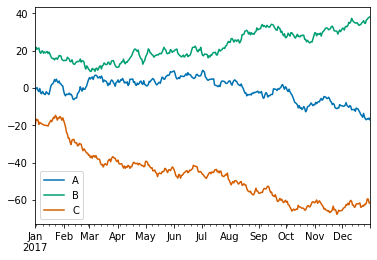

In [6]:
df.plot(); # add a semi-colon to the end of the plotting call to suppress unwanted output

We can select which plot we want to use by passing it into the 'kind' parameter.

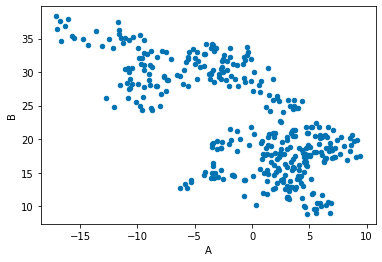

In [7]:
df.plot('A','B', kind = 'scatter');

You can also choose the plot kind by using the `DataFrame.plot.kind` methods instead of providing the `kind` keyword argument.

`kind` :
- `'line'` : line plot (default)
- `'bar'` : vertical bar plot
- `'barh'` : horizontal bar plot
- `'hist'` : histogram
- `'box'` : boxplot
- `'kde'` : Kernel Density Estimation plot
- `'density'` : same as 'kde'
- `'area'` : area plot
- `'pie'` : pie plot
- `'scatter'` : scatter plot
- `'hexbin'` : hexbin plot

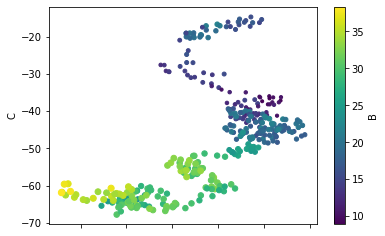

In [8]:
# create a scatter plot of columns 'A' and 'C', with changing color (c) and size (s) based on column 'B'
df.plot.scatter('A', 'C', c='B', s=df['B'], colormap='viridis')

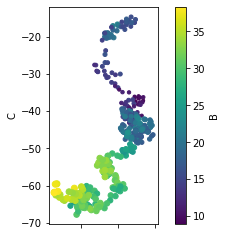

In [9]:
ax = df.plot.scatter('A', 'C', c='B', s=df['B'], colormap='viridis')
ax.set_aspect('equal')

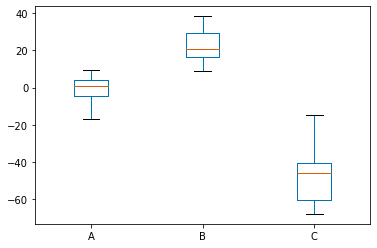

In [10]:
df.plot.box();

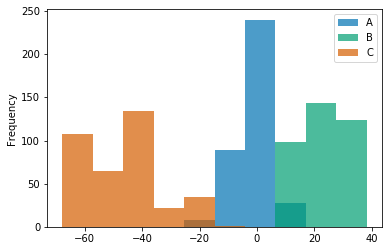

In [11]:
df.plot.hist(alpha=0.7);

[Kernel density estimation plots](https://en.wikipedia.org/wiki/Kernel_density_estimation) are useful for deriving a smooth continuous function from a given sample.

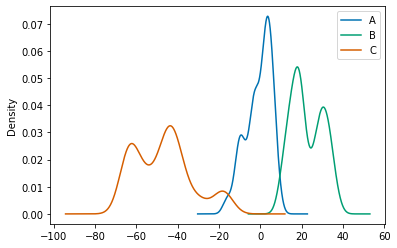

In [12]:
df.plot.kde();

### pandas.plotting

[Iris flower data set](https://en.wikipedia.org/wiki/Iris_flower_data_set)

In [22]:
iris = pd.read_csv('iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


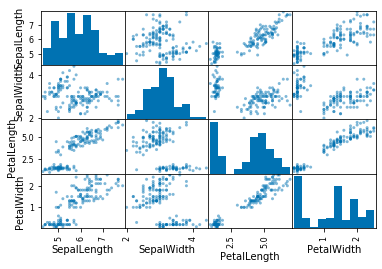

In [24]:
# a scatter matrix is a way of comparing each column in a dataFrame
pd.plotting.scatter_matrix(iris); 

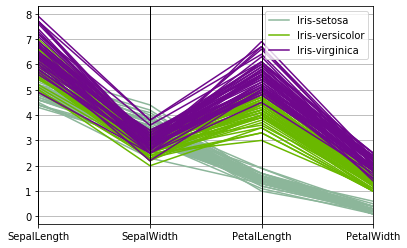

In [28]:
plt.figure()
pd.plotting.parallel_coordinates(iris, 'Name');

In [81]:
p = pd.DataFrame({'s': [1,2],
                 'y':[1,3],
                  'z': [1,2],
                 
                 'Name':['one', 'two']})

In [82]:
p

,s,y,z,Name
0,1,1,1,one
1,2,3,2,two


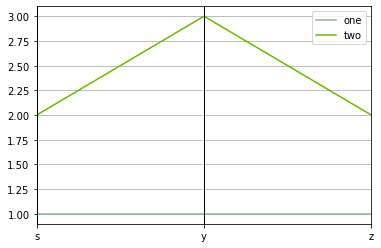

In [83]:
plt.figure()
pd.plotting.parallel_coordinates(p, 'Name');
# pd.plotting.scatter_matrix(p); 

# Seaborn

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#It adds styles to make default data visualizations much more visually
# appealing and makes creation of specific types of complicated plots much simpler.

import seaborn as sns

%matplotlib notebook

In [88]:
np.random.seed(1234)

v1 = pd.Series(np.random.normal(0,10,1000), name='v1')
v2 = pd.Series(2*v1 + np.random.normal(60,15,1000), name='v2')


<IPython.core.display.Javascript object>


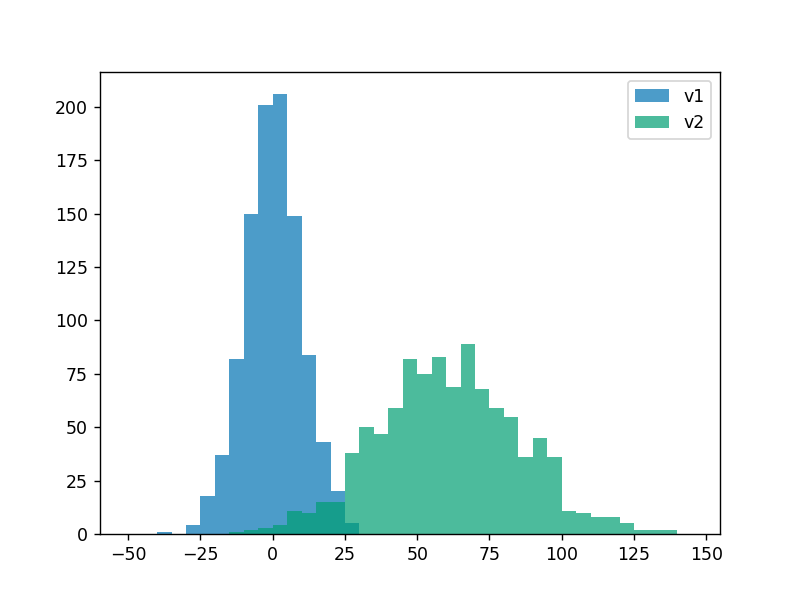

In [89]:
plt.figure()
plt.hist(v1, alpha=0.7, bins=np.arange(-50,150,5), label='v1');
plt.hist(v2, alpha=0.7, bins=np.arange(-50,150,5), label='v2');
plt.legend();

<IPython.core.display.Javascript object>


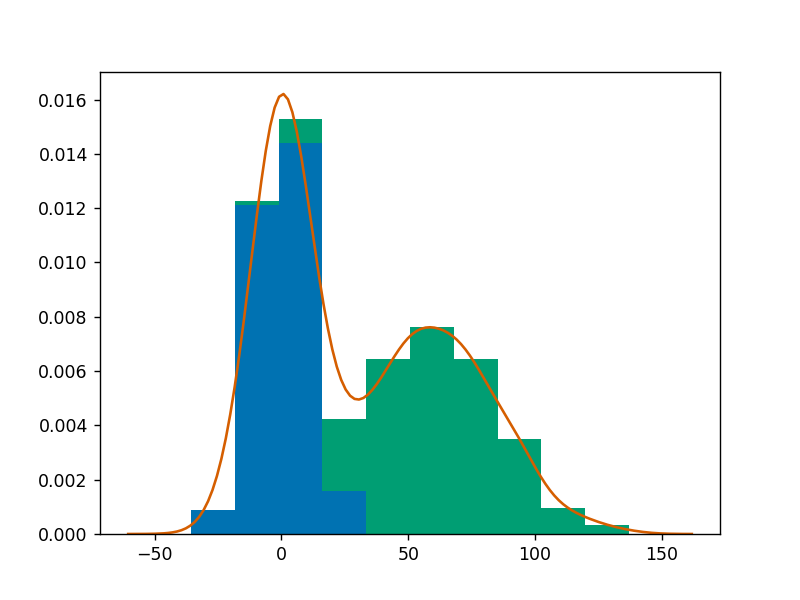

/home/omid/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [102]:
# plot a kernel density estimation over a stacked barchart
plt.figure()
plt.hist([v1, v2], histtype='barstacked', normed=True);
v3 = np.concatenate((v1,v2))
sns.kdeplot(v3);

<IPython.core.display.Javascript object>


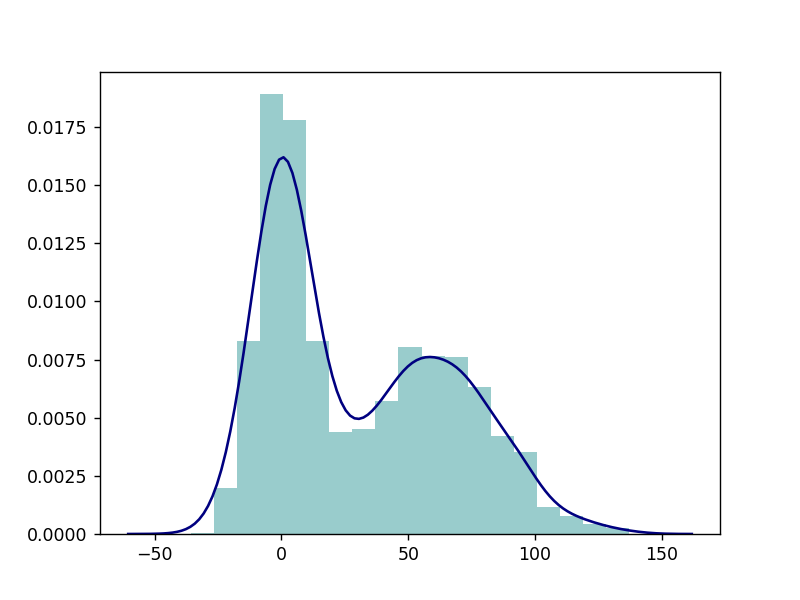

In [103]:
plt.figure()
# we can pass keyword arguments for each individual component of the plot
sns.distplot(v3, hist_kws={'color': 'Teal'}, kde_kws={'color': 'Navy'});

<IPython.core.display.Javascript object>


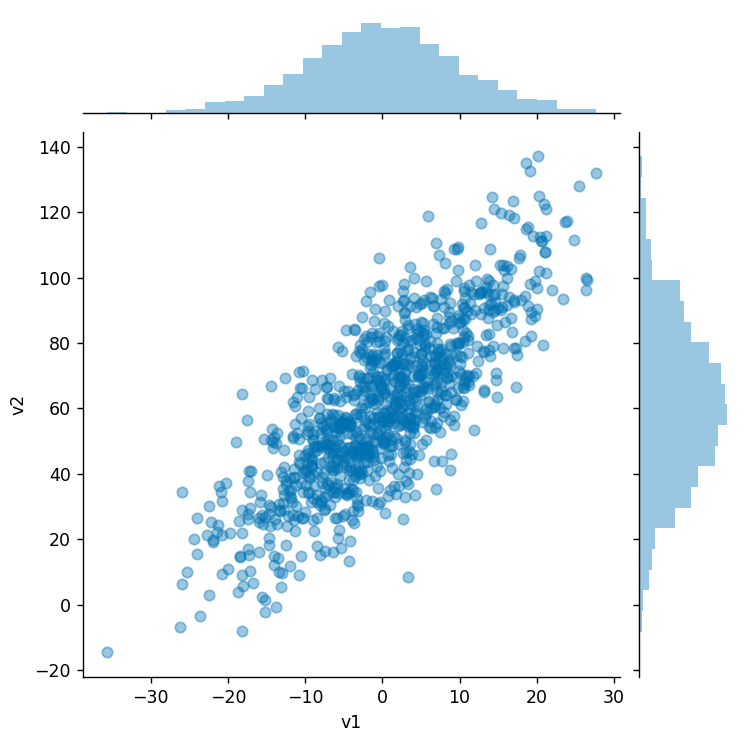

In [112]:
sns.jointplot(v1, v2, alpha=0.4);

<IPython.core.display.Javascript object>


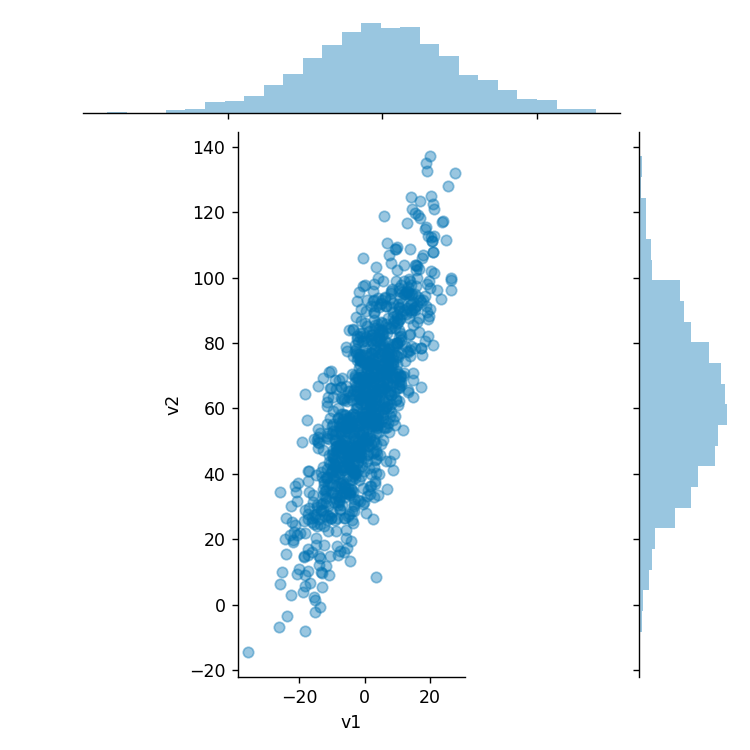

In [104]:
grid = sns.jointplot(v1, v2, alpha=0.4);
grid.ax_joint.set_aspect('equal')

<IPython.core.display.Javascript object>


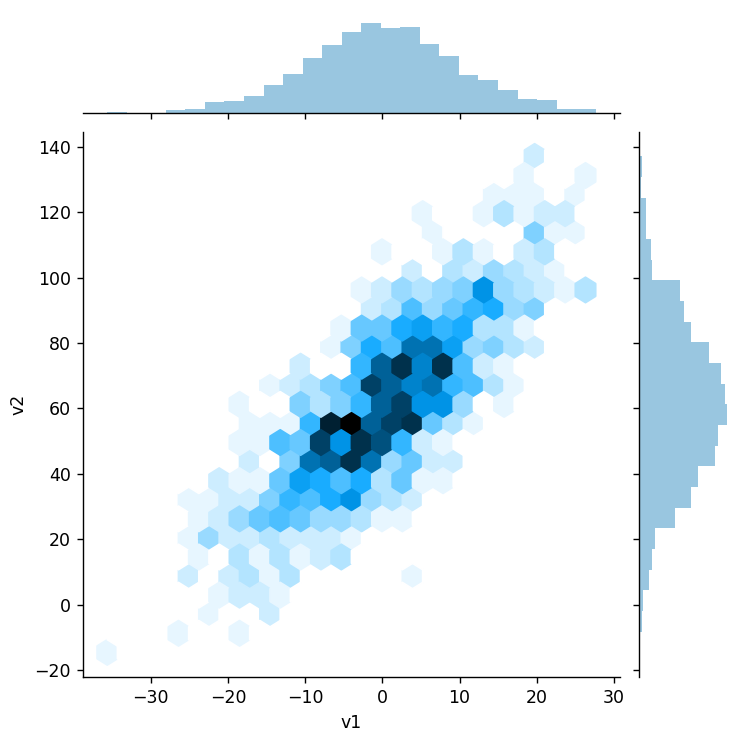

In [114]:
# Hexbin plots are the bivariate counterpart to histograms. Hexbin plots show the number of
# observations that fall within  hexagonal bins. Sns joint plot includes the hex bin style
# we can use by passing in hex to the kind parameter.
# The hexbin style of plot works well with relatively large data sets.

sns.jointplot(v1, v2, kind='hex');

<IPython.core.display.Javascript object>


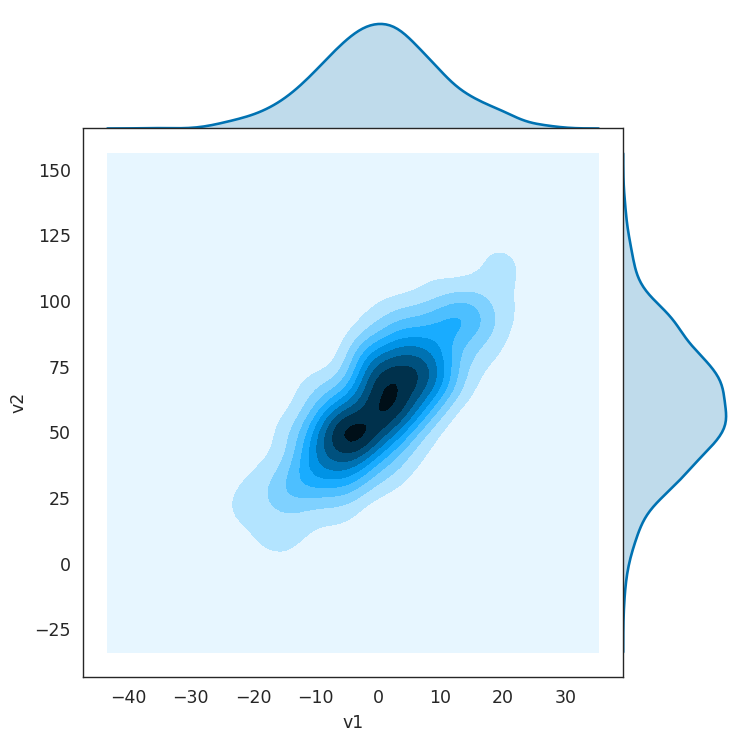

In [115]:
# set the seaborn style for all the following plots
sns.set_style('white')
# space = 0 which will plot the marginal distributions
# directly on the border of the scatter plot
sns.jointplot(v1, v2, kind='kde', space=0);

In [116]:
iris = pd.read_csv('iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


/home/omid/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


<IPython.core.display.Javascript object>


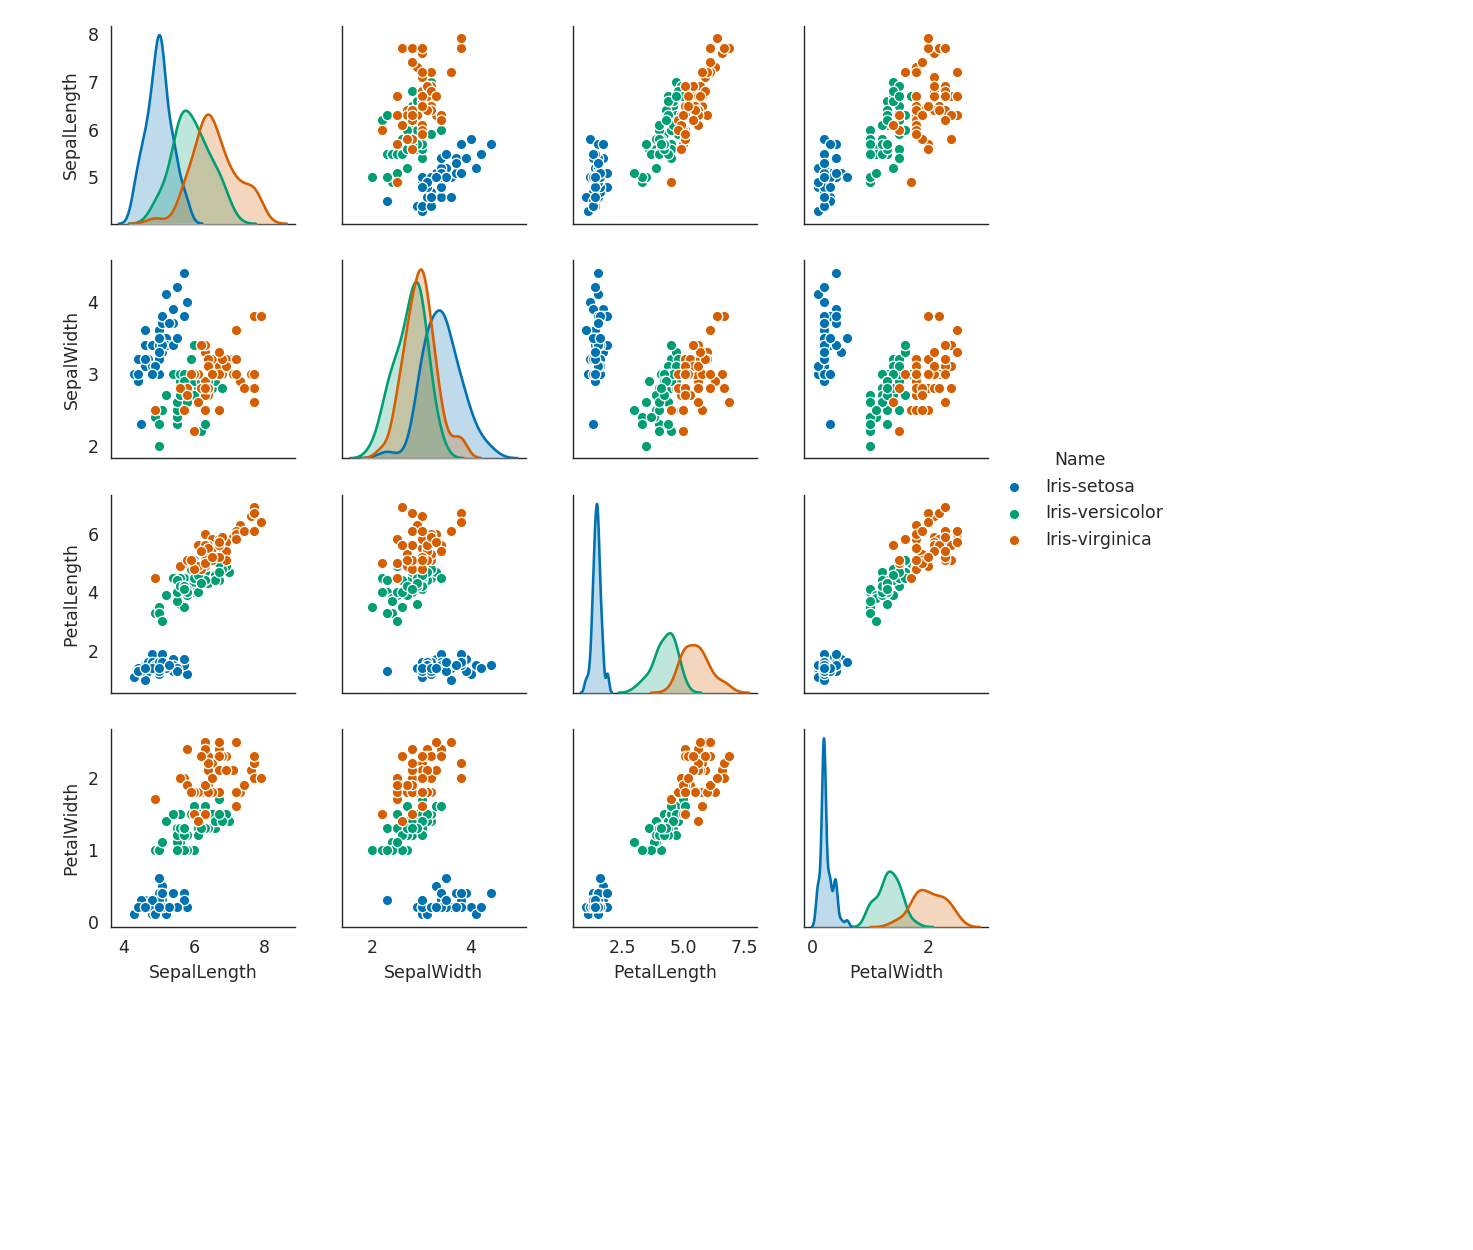

In [117]:
sns.pairplot(iris, hue='Name', diag_kind='kde', size=2);

<IPython.core.display.Javascript object>


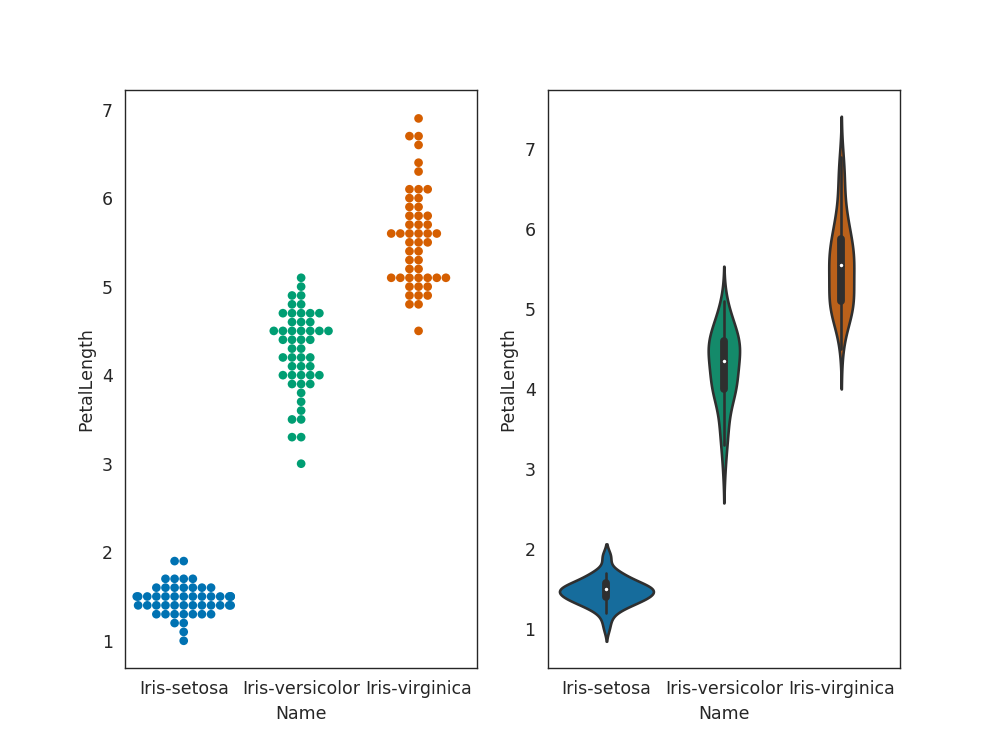

In [120]:
# Looking at the swarmplot,
# each species has its own column and each observation's petal length is shown.
# With more common values appearing as the wide parts of the cluster, much like a histogram.
# The violinplot is like box plot with a rotated kernel density estimation

plt.figure(figsize=(8,6))
plt.subplot(121)
sns.swarmplot('Name', 'PetalLength', data=iris);
plt.subplot(122)
sns.violinplot('Name', 'PetalLength', data=iris);